In [1]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import math
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                    for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}


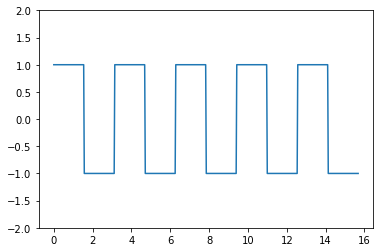

In [74]:
from scipy import fftpack,signal
import numpy as np
import matplotlib.pyplot as plt
N = 500
n = 1
t = np.linspace(0, 5*np.pi, N, endpoint=False)
period = 2 * np.pi
Input = signal.square(period / np.pi * t)

fig = plt.figure()
plt.plot(t, Input)
plt.ylim(-2, 2)                   

plt.show()

In [83]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import math
import matplotlib.pyplot as plt
def A0():
    A0 = 0
    for i in range(100):
        A0 = A0 + Input[i]/ period
    return A0
def An(n):
    An = 0
    for i in range(100):
        An = An + 2 / period*Input[i] * cos(2 * np.pi * n / period * i)
        return An
def Bn(n):
    Bn = 0
    for i in range(100):
        Bn = Bn + 2 / period * Input[i] * sin(2 * np.pi * n / period * i)
    return Bn
print(A0(),An(2),Bn(2))


1.6653345369377348e-16 0.318309886183791 -0.00207394031535619


In [86]:
def FS(x, f, n=3): # f: period, x: input
    series = A0()
    for i in range(1, n+1):   
        series = series + An(i) * cos(i * (2 * math.pi) / f * x) + Bn(i) * sin(i * (2 * math.pi) / f * x)
FS(Input,period)

1
2
3


In [92]:
i=1
f=period
#x = np.linspace(0, 2 * np.pi)
An(i) * cos(i * (2 * math.pi) / f * x) + Bn(i) * sin(i * (2 * math.pi) / f * x)

In [2]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

x, y = variables('x, y')
w, = parameters('w')
n=3
"""
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
"""
# Make the parameter objects for all the terms
a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
# Construct the series
series = a0 + sum(ai * cos(i * w * x) + bi * sin(i * w * x)
                for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))

model_dict = {y: series}

print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}


1.0


Parameter Value        Standard Deviation
a0        5.000000e-01 2.075395e-02
a1        5.734902e-12 3.277426e-02
a2        6.124943e-12 3.197889e-02
a3        3.243909e-12 3.080979e-02
b1        6.267589e-01 2.548585e-02
b2        1.986491e-02 2.643438e-02
b3        1.846406e-01 2.756060e-02
w         8.671471e-01 3.356602e-02
Status message         Optimization terminated successfully.
Number of iterations   25
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb61d659510>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb61d52c310>

Goodness of fit qualifiers:
chi_squared            0.7478591086418305
objective_value        0.37392955432091524
r_squared              0.9401712713086535


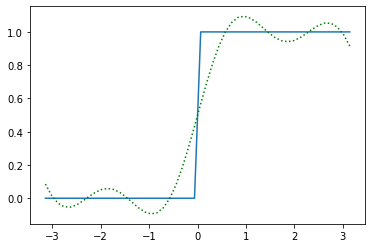

In [2]:
# Make step function data
xdata = np.linspace(-np.pi, np.pi)
ydata = np.zeros_like(xdata)
ydata[xdata > 0] = 1
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, color='green', ls=':')